## Realizamos la Carga de Las librerias que seran usadas

In [92]:
import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import librosa.display
from sklearn.preprocessing import StandardScaler
import pywt
import IPython

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [93]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython

Realizamos la importacion de y prueva del los archivos de audio 

In [94]:
IPython.display.Audio("./audio/Ambiental_1.wav")

In [95]:
IPython.display.Audio("./audio/Ambiental_2.wav")

In [96]:
IPython.display.Audio("./audio/Ambiental_3.wav")

In [97]:
IPython.display.Audio("./audio/Ambiental_4.wav")

In [98]:
IPython.display.Audio("./audio/Ambiental_5.wav")

Agrupamos los audios que profcederemos a analizar, estos audios corresponden a sonidos ambientales, se pretende explorar la posibilidad de identificar si los sonidos corresponden al mismo sitio, si existen en los sonidos ambientales patrones caracteristicos que puedan definir un sitio como particular por el ruido ambiental que se escucha.

In [99]:
audio_Am1,sr_Am1 = librosa.load("./audio/Ambiental_1.wav")
audio_Am2,sr_Am2 = librosa.load("./audio/Ambiental_2.wav")
audio_Am3,sr_Am3 = librosa.load("./audio/Ambiental_3.wav")
audio_Am4,sr_Am4 = librosa.load("./audio/Ambiental_4.wav")
audio_Am5,sr_Am5 = librosa.load("./audio/Ambiental_5.wav")

GRaficamos las amplitudesd de onda de cada audio, a modo de copmparacion de resgos en suis amplitudes y frecuencias de onda.

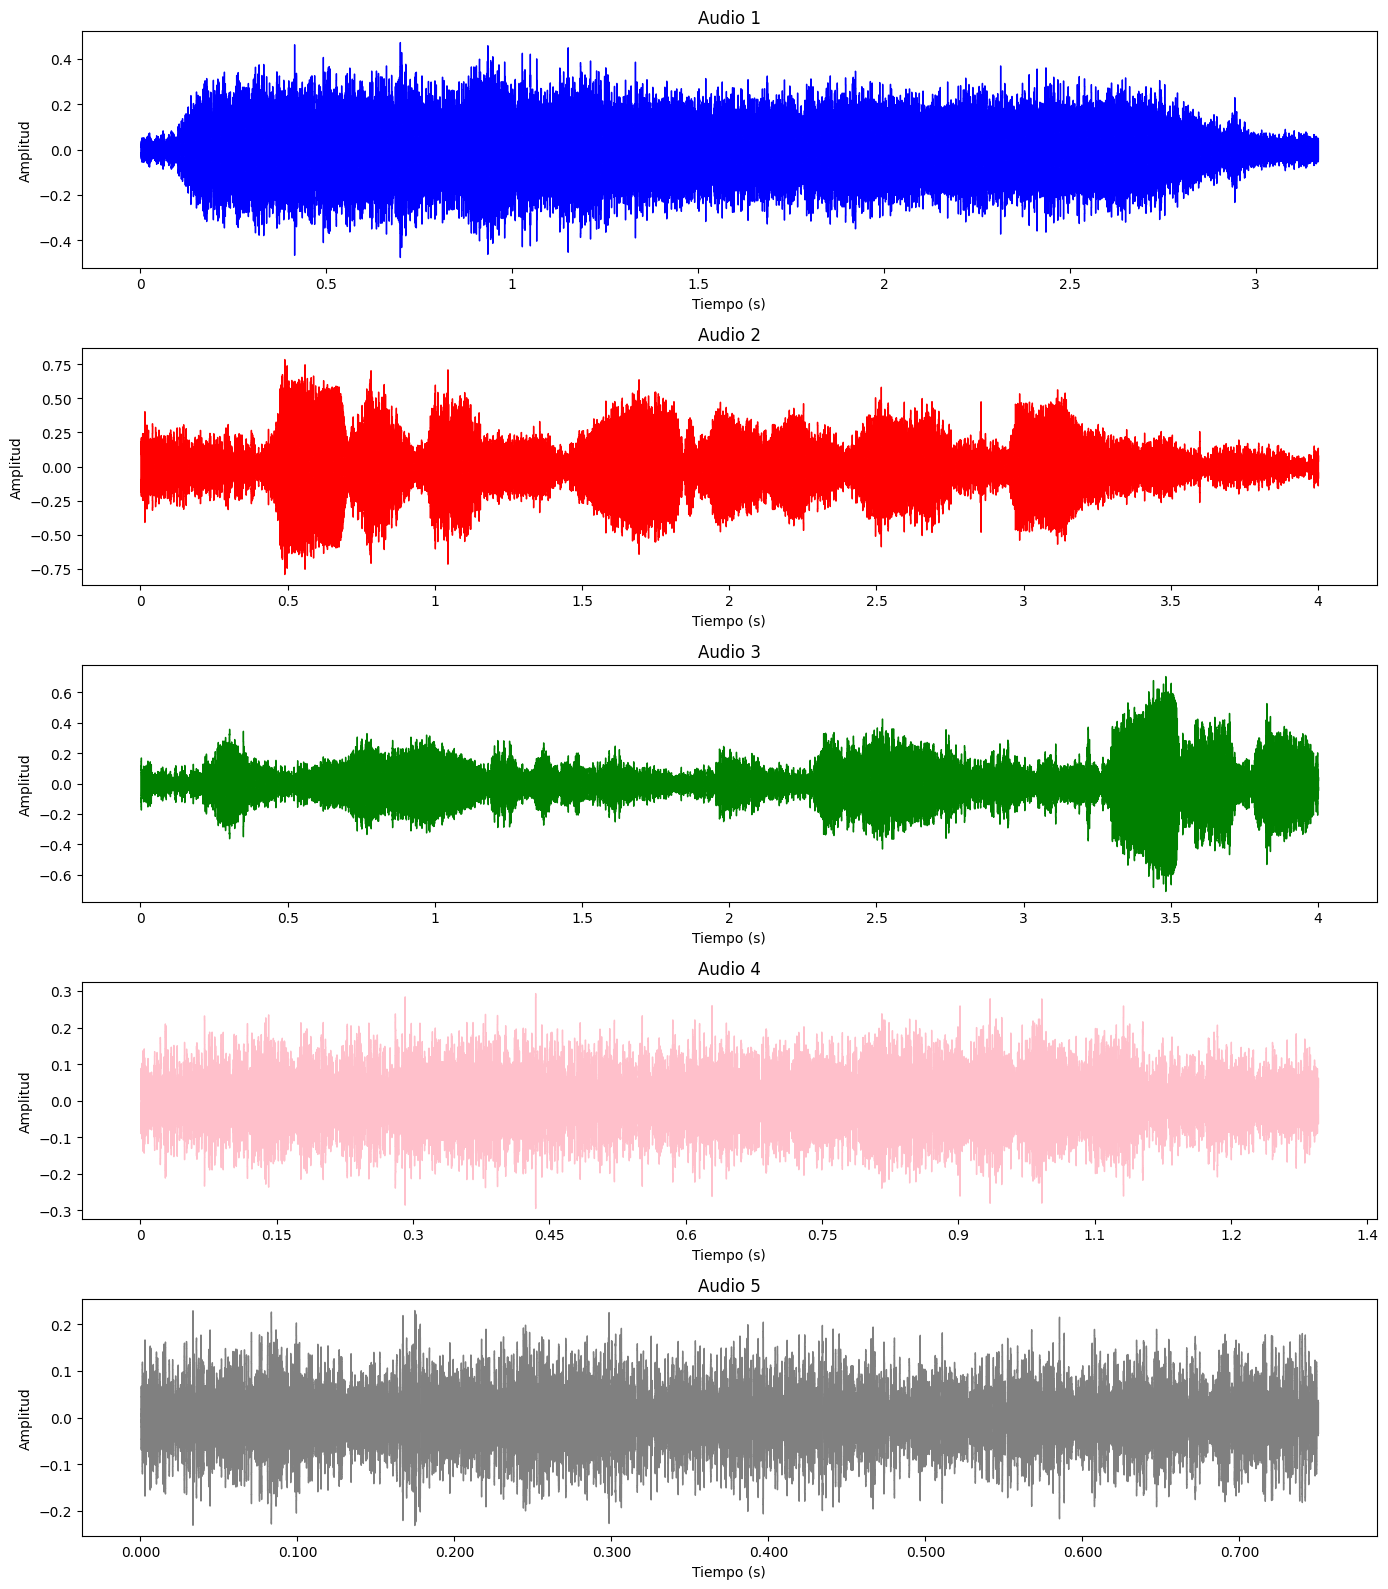

In [100]:
plt.figure(figsize=(14, 16))

plt.subplot(5, 1, 1)
librosa.display.waveshow(audio_Am1, sr=sr_Am1, color='blue')
plt.title("Audio 1")
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(5, 1, 2)
librosa.display.waveshow(audio_Am2, sr=sr_Am2, color='red')
plt.title("Audio 2")
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(5, 1, 3)
librosa.display.waveshow(audio_Am3, sr=sr_Am3, color='green')
plt.title("Audio 3")
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(5, 1, 4)
librosa.display.waveshow(audio_Am4, sr=sr_Am4, color='pink')
plt.title("Audio 4")
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(5, 1, 5)
librosa.display.waveshow(audio_Am5, sr=sr_Am5, color='grey')
plt.title("Audio 5")
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

Continuamos calculando y graficando los coeficientes MFCC, el cual es un proceso de filtrado conocido como Mel-Cepstral el cual esta basado en el rango de frecuencias de Mel y la separacion de frecuencias empleando el filtrado Cepstrum, Mel considera la señal dentro del rango auditivo, permite identificar aquellas frecuecnias que se persiven mas facilmente por el oido humano, mientras que el filtrado Cepstrum separa la señal de vos en dos rangos, alta y baja

#### Coeficientes   
- Coeficiente 0 (Energía o Energía Logarítmica): Representa la energía total de la señal, útil para distinguir entre sonidos fuertes y suaves.
- Coeficiente 1: Corresponde a los componentes de baja frecuencia de la señal, relacionada con la información tonal y los formantes bajos en la voz humana.
- Coeficiente 2: Representación de frecuencias bajas a medias, que son importantes para la claridad del habla.
- Coeficiente 3: Representa componentes de frecuencia media, que son importantes para distinguir entre diferentes sonidos del habla.
- Coeficientes 4-12: Capturan componentes de frecuencia más alta que corresponden a variaciones sutiles en la voz y otros sonidos.



In [101]:
#calculamos el MFCC---~~ audio_Am1,sr_Am1
mfccs1 = librosa.feature.mfcc(y=audio_Am1, sr=sr_Am1, n_mfcc=13)
mfccs2 = librosa.feature.mfcc(y=audio_Am2, sr=sr_Am2, n_mfcc=13)
mfccs3 = librosa.feature.mfcc(y=audio_Am3, sr=sr_Am3, n_mfcc=13)
mfccs4 = librosa.feature.mfcc(y=audio_Am4, sr=sr_Am4, n_mfcc=13)
mfccs5 = librosa.feature.mfcc(y=audio_Am5, sr=sr_Am5, n_mfcc=13)

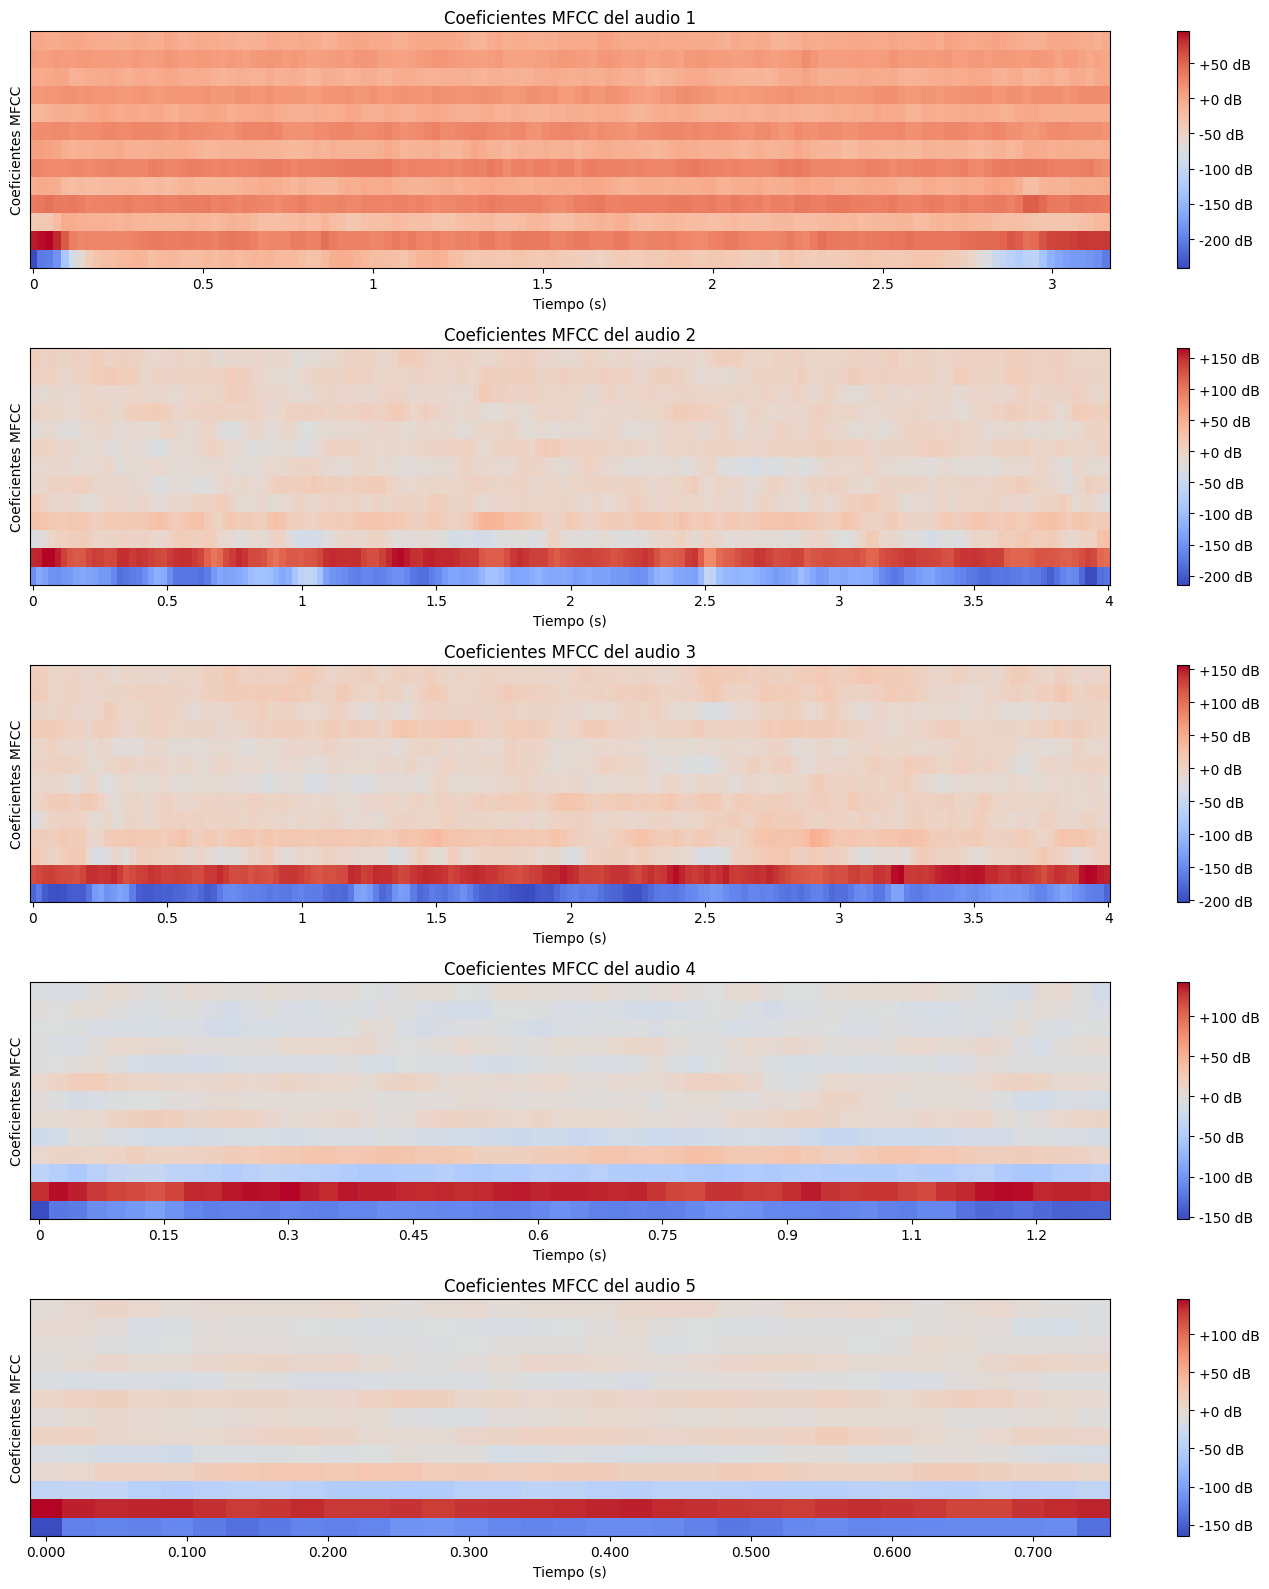

In [102]:

plt.figure(figsize=(14, 16))

plt.subplot(5, 1, 1)
librosa.display.specshow(mfccs1, x_axis='time')
plt.xlabel('Tiempo (s)')
plt.ylabel('Coeficientes MFCC')
plt.colorbar(format='%+2.0f dB')
plt.title("Coeficientes MFCC del audio 1")


plt.subplot(5, 1, 2)
librosa.display.specshow(mfccs2, x_axis='time')
plt.xlabel('Tiempo (s)')
plt.ylabel('Coeficientes MFCC')
plt.colorbar(format='%+2.0f dB')
plt.title("Coeficientes MFCC del audio 2")


plt.subplot(5, 1, 3)
librosa.display.specshow(mfccs3, x_axis='time')
plt.xlabel('Tiempo (s)')
plt.ylabel('Coeficientes MFCC')
plt.colorbar(format='%+2.0f dB')
plt.title("Coeficientes MFCC del audio 3")


plt.subplot(5, 1, 4)
librosa.display.specshow(mfccs4, x_axis='time')
plt.xlabel('Tiempo (s)')
plt.ylabel('Coeficientes MFCC')
plt.colorbar(format='%+2.0f dB')
plt.title("Coeficientes MFCC del audio 4")


plt.subplot(5, 1, 5)
librosa.display.specshow(mfccs5, x_axis='time')
plt.xlabel('Tiempo (s)')
plt.ylabel('Coeficientes MFCC')
plt.colorbar(format='%+2.0f dB')
plt.title("Coeficientes MFCC del audio 5")


plt.tight_layout()
plt.show()

Acointinuacion se calcula el espectrograma de señal de audio, el cual nos indica los rangos del espectro de frecuencias que cubre el sonido que analizamos.

In [103]:
#audio_Am1,sr_Am1
S1 = librosa.stft(audio_Am1)
S_db1 = librosa.amplitude_to_db(np.abs(S1), ref=np.max)

S2 = librosa.stft(audio_Am2)
S_db2 = librosa.amplitude_to_db(np.abs(S2), ref=np.max)

S3 = librosa.stft(audio_Am3)
S_db3 = librosa.amplitude_to_db(np.abs(S3), ref=np.max)

S4 = librosa.stft(audio_Am4)
S_db4 = librosa.amplitude_to_db(np.abs(S4), ref=np.max)

S5 = librosa.stft(audio_Am5)
S_db5 = librosa.amplitude_to_db(np.abs(S5), ref=np.max)

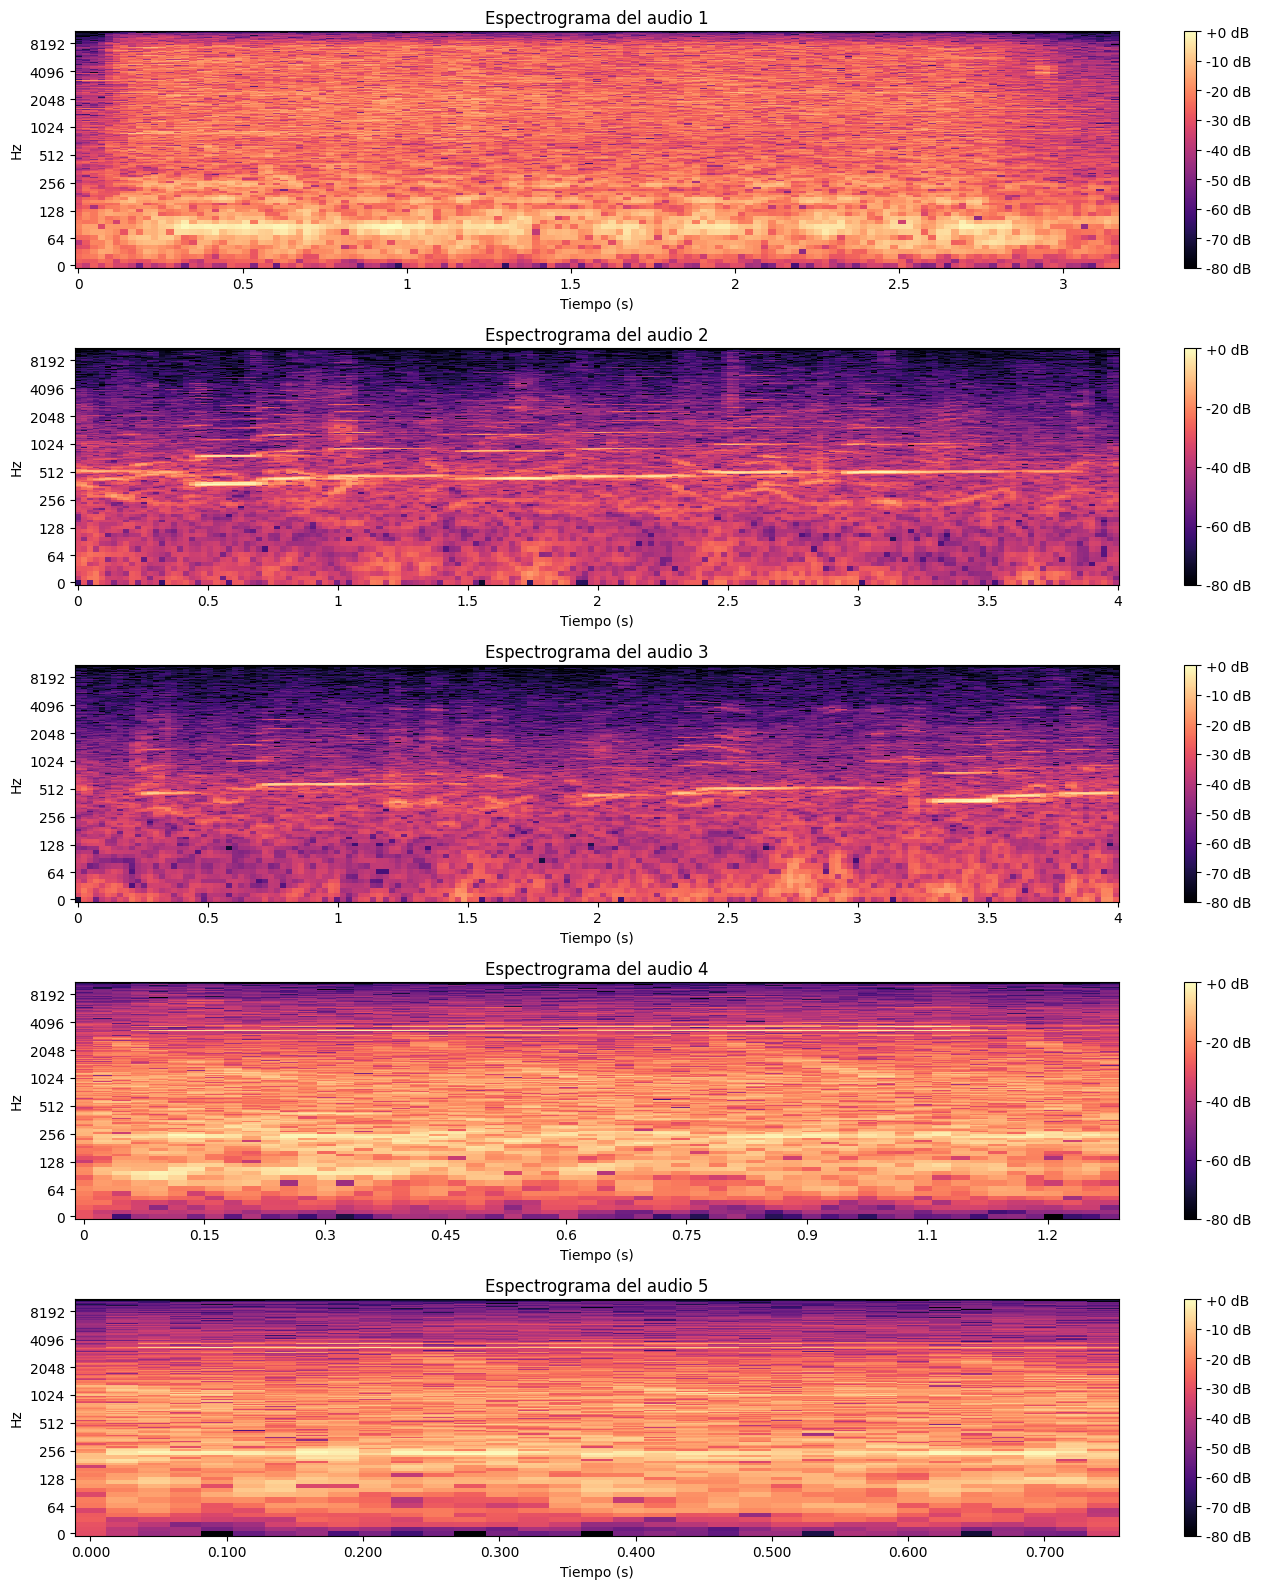

In [104]:
#audio_Am1,sr_Am1
plt.figure(figsize=(14, 16))

plt.subplot(5, 1, 1)
librosa.display.specshow(S_db1, sr=sr_Am1, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma del audio 1')
plt.xlabel('Tiempo (s)')


plt.subplot(5, 1, 2)
librosa.display.specshow(S_db2, sr=sr_Am2, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma del audio 2')
plt.xlabel('Tiempo (s)')


plt.subplot(5, 1, 3)
librosa.display.specshow(S_db3, sr=sr_Am3, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma del audio 3')
plt.xlabel('Tiempo (s)')


plt.subplot(5, 1, 4)
librosa.display.specshow(S_db4, sr=sr_Am4, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma del audio 4')
plt.xlabel('Tiempo (s)')


plt.subplot(5, 1, 5)
librosa.display.specshow(S_db5, sr=sr_Am5, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma del audio 5')
plt.xlabel('Tiempo (s)')


plt.tight_layout()
plt.show()

Frecuecnias representativas del espectrograma

1.- Generar frecuencias y tiempos del espectrograma

2.- Sumar las amplitudes a lo largo del tiempo para cada frecuencia

3.- Seleccion de del top 10 frecuencias mas representativas y su grafica

In [105]:
# Paso 1
#audio_Am1,sr_Am1
frequencies1 = librosa.fft_frequencies(sr=sr_Am1)
times1 = librosa.frames_to_time(np.arange(S_db1.shape[1]), sr=sr_Am1)

frequencies2 = librosa.fft_frequencies(sr=sr_Am2)
times2 = librosa.frames_to_time(np.arange(S_db2.shape[1]), sr=sr_Am2)

frequencies3 = librosa.fft_frequencies(sr=sr_Am3)
times3 = librosa.frames_to_time(np.arange(S_db3.shape[1]), sr=sr_Am3)

frequencies4 = librosa.fft_frequencies(sr=sr_Am4)
times4 = librosa.frames_to_time(np.arange(S_db4.shape[1]), sr=sr_Am4)

frequencies5 = librosa.fft_frequencies(sr=sr_Am5)
times5 = librosa.frames_to_time(np.arange(S_db5.shape[1]), sr=sr_Am5)

In [106]:
#Paso 2
sum_amplitudes1 = np.sum(S_db1, axis=1)
sum_amplitudes2 = np.sum(S_db2, axis=1)
sum_amplitudes3 = np.sum(S_db3, axis=1)
sum_amplitudes4 = np.sum(S_db4, axis=1)
sum_amplitudes5 = np.sum(S_db5, axis=1)


In [107]:
#paso 3
top_n = 10

top_indices1 = np.argsort(sum_amplitudes1)[-top_n:][::-1]
top_frequencies1 = frequencies1[top_indices1]
top_amplitudes1 = sum_amplitudes1[top_indices1]

top_indices2 = np.argsort(sum_amplitudes2)[-top_n:][::-1]
top_frequencies2 = frequencies2[top_indices2]
top_amplitudes2 = sum_amplitudes2[top_indices2]

top_indices3 = np.argsort(sum_amplitudes3)[-top_n:][::-1]
top_frequencies3 = frequencies3[top_indices3]
top_amplitudes3 = sum_amplitudes3[top_indices3]

top_indices4 = np.argsort(sum_amplitudes4)[-top_n:][::-1]
top_frequencies4 = frequencies4[top_indices4]
top_amplitudes4 = sum_amplitudes4[top_indices4]

top_indices5 = np.argsort(sum_amplitudes5)[-top_n:][::-1]
top_frequencies5 = frequencies5[top_indices5]
top_amplitudes5 = sum_amplitudes5[top_indices5]


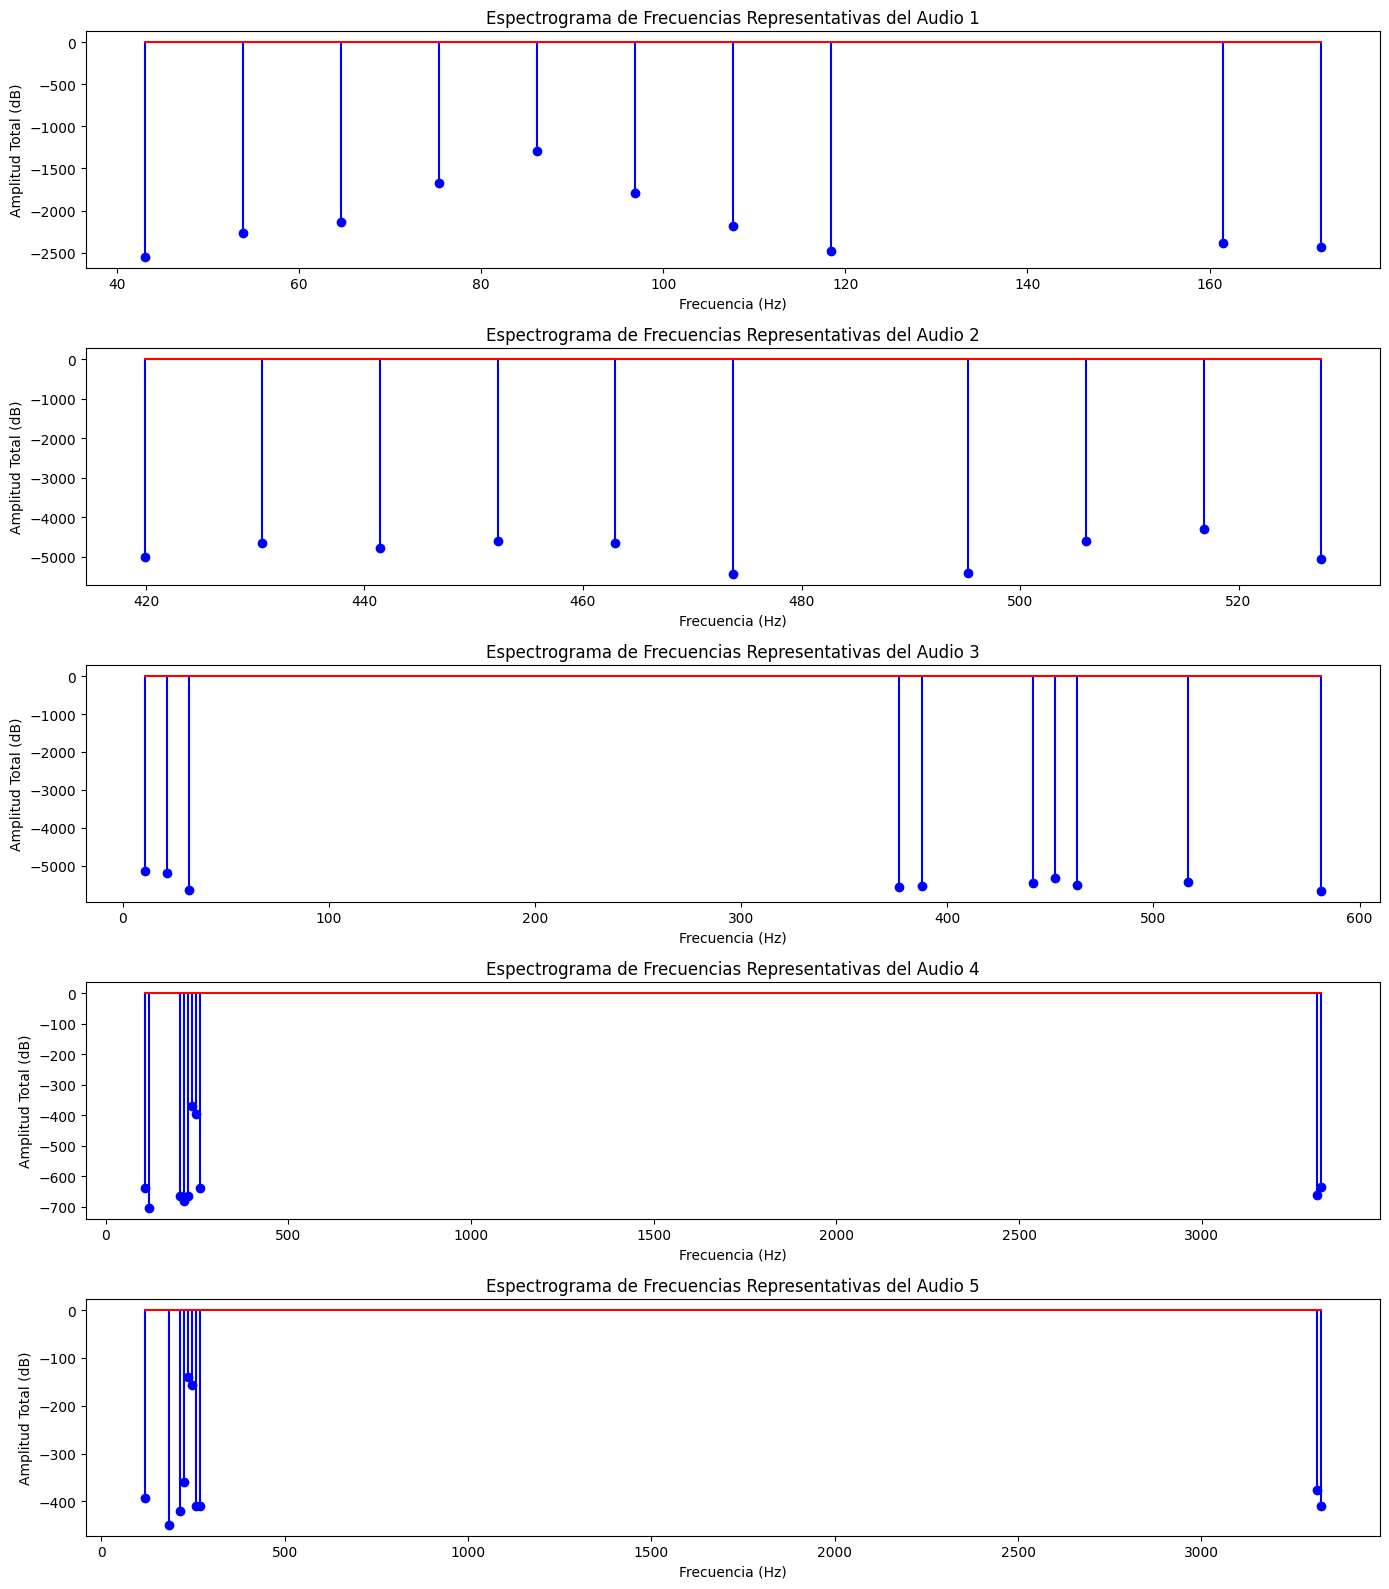

In [108]:
plt.figure(figsize=(14, 16))

plt.subplot(5, 1, 1)
plt.stem(top_frequencies1, top_amplitudes1, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud Total (dB)')
plt.title('Espectrograma de Frecuencias Representativas del Audio 1')


plt.subplot(5, 1, 2)
plt.stem(top_frequencies2, top_amplitudes2, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud Total (dB)')
plt.title('Espectrograma de Frecuencias Representativas del Audio 2')


plt.subplot(5, 1, 3)
plt.stem(top_frequencies3, top_amplitudes3, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud Total (dB)')
plt.title('Espectrograma de Frecuencias Representativas del Audio 3')


plt.subplot(5, 1, 4)
plt.stem(top_frequencies4, top_amplitudes4, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud Total (dB)')
plt.title('Espectrograma de Frecuencias Representativas del Audio 4')


plt.subplot(5, 1, 5)
plt.stem(top_frequencies5, top_amplitudes5, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud Total (dB)')
plt.title('Espectrograma de Frecuencias Representativas del Audio 5')


plt.tight_layout()
plt.show()

### Pruebas estadisticas 

#### Varianza

In [125]:
import numpy as np
from scipy.stats import levene

# prueba de Levene
alpha = 0.05
stat, p_value = levene( sum_amplitudes5, sum_amplitudes3)

print(f"Estadístico de Levene: {stat}")
print(f"P-valor: {p_value}")

if p_value < alpha:
    print("Las varianzas de las sumas de amplitudes son significativamente diferentes.")
else:
    print("No hay una diferencia significativa en las varianzas de las sumas de amplitudes.")


Estadístico de Levene: 520.0584736298997
P-valor: 9.091033845899195e-103
Las varianzas de las sumas de amplitudes son significativamente diferentes.


In [110]:
import numpy as np
from scipy.stats import levene, ttest_ind

# Supongamos que ya tienes las matrices S_db1, S_db2, etc., cargadas

# Calcula las sumas de amplitudes
sum_amplitudes1 = np.sum(S_db1, axis=1)
sum_amplitudes2 = np.sum(S_db2, axis=1)
sum_amplitudes3 = np.sum(S_db3, axis=1)
sum_amplitudes4 = np.sum(S_db4, axis=1)
sum_amplitudes5 = np.sum(S_db5, axis=1)

# Realiza la prueba de Levene para comparar las varianzas
alpha = 0.05
stat, p_value = levene(sum_amplitudes1, sum_amplitudes2, sum_amplitudes3, sum_amplitudes4, sum_amplitudes5)

if p_value < alpha:
    t_stat, p_value = ttest_ind(sum_amplitudes1, sum_amplitudes2, equal_var=False)
else:
    t_stat, p_value = ttest_ind(sum_amplitudes1, sum_amplitudes2, equal_var=True)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretación del resultado
if p_value < alpha:
    print("Hay una diferencia significativa en las amplitudes medias de los grupos.")
else:
    print("No hay una diferencia significativa en las amplitudes medias de los grupos.")


T-statistic: 76.09611166265893
P-value: 0.0
Hay una diferencia significativa en las amplitudes medias de los grupos.


In [111]:
import numpy as np
from scipy.stats import levene, ttest_ind

# Supongamos que ya tienes las matrices S_db1, S_db2, etc., cargadas

# Calcula las sumas de amplitudes
sum_amplitudes1 = np.sum(S_db1, axis=1)
sum_amplitudes2 = np.sum(S_db2, axis=1)
sum_amplitudes3 = np.sum(S_db3, axis=1)
sum_amplitudes4 = np.sum(S_db4, axis=1)
sum_amplitudes5 = np.sum(S_db5, axis=1)

# Realiza la prueba de Levene para comparar las varianzas
alpha = 0.05
stat, p_value = levene(sum_amplitudes2, sum_amplitudes3)

if p_value < alpha:
    t_stat, p_value = ttest_ind(sum_amplitudes2, sum_amplitudes3, equal_var=False)
else:
    t_stat, p_value = ttest_ind(sum_amplitudes2, sum_amplitudes3, equal_var=True)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretación del resultado
if p_value < alpha:
    print("Hay una diferencia significativa en las amplitudes medias de los grupos.")
else:
    print("No hay una diferencia significativa en las amplitudes medias de los grupos.")

T-statistic: 3.708542946158588
P-value: 0.00021400136509125425
Hay una diferencia significativa en las amplitudes medias de los grupos.


In [116]:
import numpy as np
from scipy.stats import levene

# Supongamos que ya tienes las frecuencias sr_Am1, sr_Am2, etc., cargadas

# Calcula las varianzas de las frecuencias
variance1 = np.var(frequencies1)
variance2 = np.var(frequencies2)
variance3 = np.var(frequencies3)
variance4 = np.var(frequencies4)
variance5 = np.var(frequencies5)

# Realiza la prueba de Levene para comparar las varianzas
alpha = 0.05
stat, p_value = levene(variance2, variance4)

print(f"Estadístico de Levene: {stat}")
print(f"P-valor: {p_value}")

if p_value < alpha:
    print("Las varianzas de las frecuencias son significativamente diferentes.")
else:
    print("No hay una diferencia significativa en las varianzas de las frecuencias.")


Estadístico de Levene: nan
P-valor: nan
No hay una diferencia significativa en las varianzas de las frecuencias.


c:\Users\juanj\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_morestats.py:3345: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


In [123]:
import numpy as np
from scipy.stats import levene

# Supongamos que ya tienes las frecuencias sr_Am1, sr_Am2, etc., cargadas

# Calcula las varianzas de las frecuencias
variance1 = np.var(times1)
variance2 = np.var(times2)
variance3 = np.var(times3)
variance4 = np.var(times4)
variance5 = np.var(times5)

# Realiza la prueba de Levene para comparar las varianzas
alpha = 0.05
stat, p_value = levene(variance2, variance3)

print(f"Estadístico de Levene: {stat}")
print(f"P-valor: {p_value}")

if p_value < alpha:
    print("Las varianzas de las frecuencias son significativamente diferentes.")
else:
    print("No hay una diferencia significativa en las varianzas de las frecuencias.")

Estadístico de Levene: nan
P-valor: nan
No hay una diferencia significativa en las varianzas de las frecuencias.


c:\Users\juanj\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_morestats.py:3345: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom
